C:\Users\Administrator\AppData\Local\Temp\ipykernel_436\512792304.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, encoding='ansi')


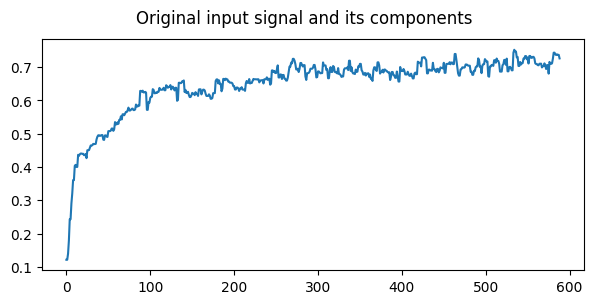

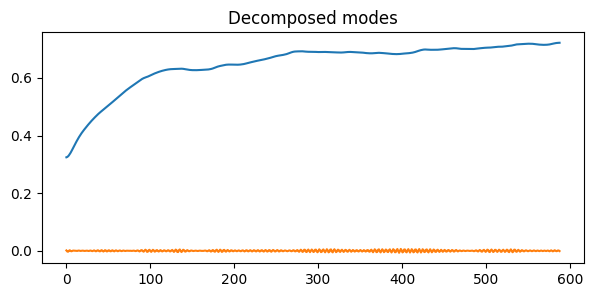

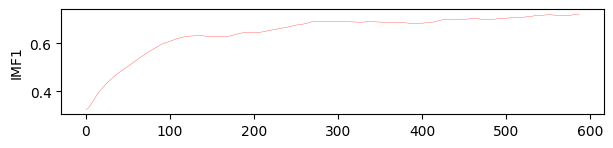

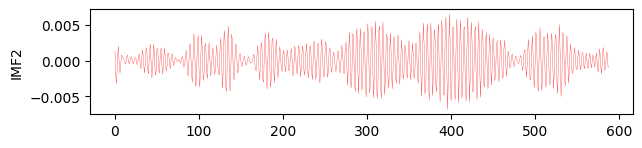

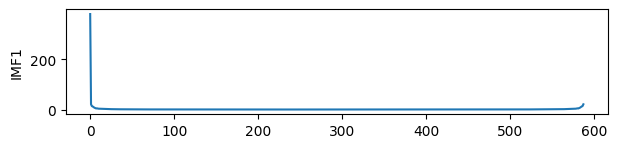

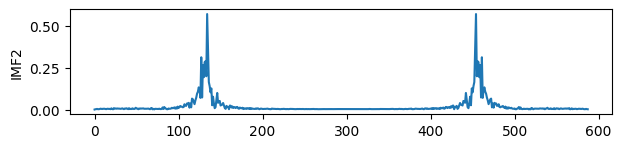

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from vmdpy import VMD  
from scipy.fftpack import fft

file_path = '../data20240905/friction/1Cr/process16.txt'

# Load the data into a DataFrame with a specified encoding
data = pd.read_csv(file_path, delim_whitespace=True, encoding='ansi')

# Extract the relevant columns
time_sec = data['时间(Sec)']
friction_force = data['摩擦系数']

output_data = pd.DataFrame({
    '时间(Sec)': time_sec[:-10],
    '摩擦系数': friction_force[:-10]
})

output_file_path = file_path[:-4] + ".csv"
output_data.to_csv(output_file_path, index=False, encoding='utf-8-sig')


filename= output_file_path
f = pd.read_csv(filename,usecols=[1])

alpha = 7000        # moderate bandwidth constraint  
tau = 0.            # noise-tolerance (no strict fidelity enforcement)  
K = 2      
DC = 0              # no DC part imposed  
init = 1            # initialize omegas uniformly  
tol = 1e-7  

u, u_hat, omega = VMD(f.values, alpha, tau, K, DC, init, tol) 

# 绘制原始信号和各个模态
fig1 = plt.figure(figsize=(7,3), dpi=100)
plt.plot(f.values)
fig1.suptitle('Original input signal and its components')

# 绘制分解得到的模态
plt.figure(figsize=(7,3), dpi=100)
plt.plot(u.T)
plt.title('Decomposed modes')

# 绘制每个模态的时域图
for i in range(K):
    plt.figure(figsize=(7,3), dpi=100)
    plt.subplot(K,1,i+1)
    plt.plot(u[i,:], linewidth=0.2, c='r')
    plt.ylabel('IMF{}'.format(i+1))
    
# 中心模态 绘制每个模态的频域图
for i in range(K):
    plt.figure(figsize=(7,3), dpi=100)
    plt.subplot(K,1,i+1)
    plt.plot(abs(fft(u[i,:])))      # abs(fft(u[i,:])) 提取模态的频率成分。
    plt.ylabel('IMF{}'.format(i+1))
    
# 保存子序列数据到文件中
for i  in range(K):
    # a = u[i,:]
    a = abs(fft(u[i,:]))
    dataframe = pd.DataFrame({'v{}'.format(i+1):a})
    dataframe.to_csv(file_path[:-4] + "_VMDfft-%d.csv"%(i+1),index=False,sep=',')  